# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature.

### DEADLINE: 26-September-2021

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just inmport the libraries that will be needed throughout the assignment.

In [2]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Datasets

For solving the question posed, you have the following datasets available.

### City temperature

File ```assignment1/city_temp.csv``` contains the information about average temperature in a set of weather stations located around the work. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* city, the name of the city where the weather station is located;
* temperature, the average temperature registered in the given day and city.

The dataset does not include data for all stations for all the dates - while for some stations, data starts in 1995 and ends in 2020, for others stations it is available only in shorter intervals; even for stations for which data is available from 1995 to 2020, the data is missing for some days.

The data in this file is based on a dataset publicly available at [University of Dayton - Environmental Protection Agency Average Daily Temperature Archive](http://academic.udayton.edu/kissock/http/Weather/default.htm).

File ```assignment1/cities.csv``` contains information about cities. The dataset includes the following columns:
* region, with the region in which the city is located;
* country, the country of the city;
* city, with the name of the city.

The following given code loads the dataset.


In [3]:
dataFileName = os.path.join( "assignment1", "city_temp.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(10))

        date     city  temperature
0 1995-01-01  Algiers         17.9
1 1995-01-02  Algiers          9.7
2 1995-01-03  Algiers          9.3
3 1995-01-04  Algiers          8.0
4 1995-01-05  Algiers          8.8
5 1995-01-06  Algiers          9.3
6 1995-01-07  Algiers          9.4
7 1995-01-08  Algiers          9.5
8 1995-01-09  Algiers          9.4
9 1995-01-10  Algiers         11.1


In [211]:
citiesFileName = os.path.join( "assignment1", "cities.csv")

citiesDF = pd.read_csv(citiesFileName)

print(citiesDF.head(10))

          region               country          city
0         Africa           Ivory Coast       Abidjan
1  North America                    US       Abilene
2    Middle East  United Arab Emirates     Abu Dhabi
3         Africa              Ethiopia   Addis Ababa
4  North America                    US  Akron Canton
5  North America                    US        Albany
6  North America                    US   Albuquerque
7         Africa               Algeria       Algiers
8  North America                    US     Allentown
9           Asia            Kazakhstan        Almaty


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use thdescribeata computed in the previous one, when useful.


### **1.a)** What is the earliest and latest date for which there is data?


In [212]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
print("Minimum date is: " + str(dataDF["date"].min()))
print("Maximum date is: " + str(dataDF["date"].max()))

Minimum date is: 1995-01-01 00:00:00
Maximum date is: 2020-05-13 00:00:00


### **1.b)** For Lisbon, print the information for the day with the highest temperature.


In [213]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
def nlarge(p):
    return p.nlargest(1,["temperature"])

maxDayLisbon = dataDF[dataDF["city"]=="Lisbon"][["date","city","temperature"]].groupby("temperature").apply(nlarge).max()
L=maxDayLisbon.to_list()

print("The day with the maximum temperature in Lisbon is : " + str(L[0]) + " in which was recorded a temperature of " + str(L[2]))

The day with the maximum temperature in Lisbon is : 2018-08-04 00:00:00 in which was recorded a temperature of 35.7


### **1.c)** For Lisbon, how many days with data exist in each year, between 2010 and 2019?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [353]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
lisbonDF=dataDF[dataDF["city"]=="Lisbon"]
timeZoneLisbon = lisbonDF.loc[(lisbonDF['date'].dt.year >= 2010 ) & (lisbonDF['date'].dt.year <= 2019)]
timeZoneLisbon["date"].groupby(timeZoneLisbon["date"].dt.year).count()

date
2010    365
2011    364
2012    365
2013    363
2014    364
2015    363
2016    362
2017    365
2018    361
2019    359
Name: date, dtype: int64

### **1.d)** For Lisbon, what is the average number of days with data, between 2010 and 2019?


In [215]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
timeZoneLisbon["date"].groupby(timeZoneLisbon["date"].dt.year).count().mean()

363.1

## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### **2.a)** Display the information about temperature for Lisbon since 2018.

Plot the information about temperature in Lisbon since 2018. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.


<AxesSubplot:title={'center':'Temperature variation in Lisbon since 2018'}, xlabel='date'>

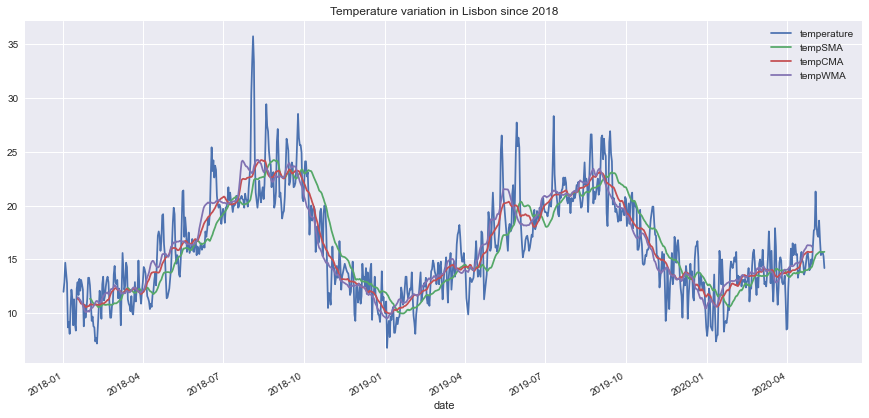

In [216]:
#Solve question here. Briefly discuss the rationale of your solution in the following markdown cell.
timeZoneLisbonNew = lisbonDF.loc[lisbonDF['date'].dt.year >= 2018].copy()
timeZoneLisbonNew["tempCMA"] = timeZoneLisbonNew["temperature"].rolling(30, center=True).mean()
timeZoneLisbonNew["tempSMA"] = timeZoneLisbonNew["temperature"].rolling(30, center=False).mean()
weights=list(range(30))
timeZoneLisbonNew["tempWMA"] = timeZoneLisbonNew["temperature"].rolling(30, center=True).apply(lambda x : sum(x*weights)/sum(weights))

timeZoneLisbonNew.plot(figsize=(15,7), x="date", y=["temperature","tempSMA","tempCMA","tempWMA"],
                       title="Temperature variation in Lisbon since 2018")

**Rationale:** to be completed 
_After plotting raw temperatures and computing different Moving Averages to reduce noises and compare them for a 363 (mean yealy days in datasets) rolling window, the MA curves deliver the same information: **for the two and a half years, the seasonality of temperature stayed the same, we do not observe and incresing or decreasing trend, so average tempertures have stayed the same**_

### **2.b)** Display long-term trends.

In this question we want to verify the long term trends, e.g. whether temperature has been increasing over the years in the full period for which data is available, without being too much impacted by the natural variability over each year. 

Select 3 cities in different continents (e.g. Lisbon, New York City and Tokyo), compute the necessary data and plot it.

<AxesSubplot:xlabel='date'>

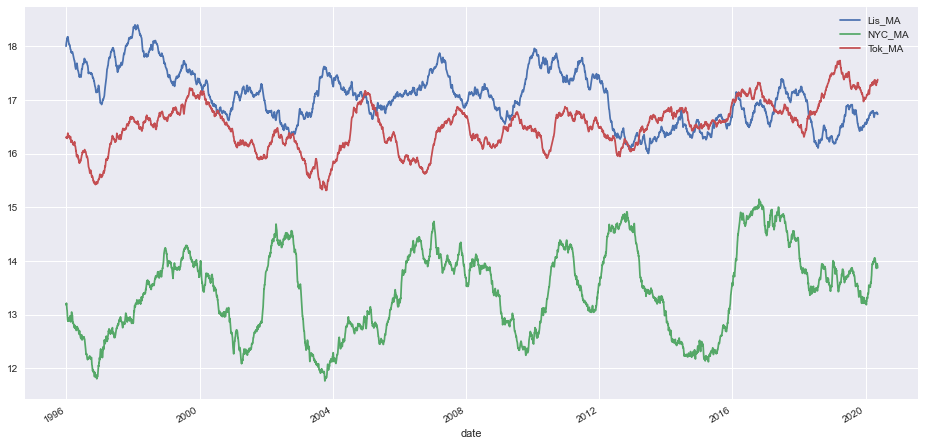

In [351]:
#Solve question here. Briefly discuss the rationale of your solution in the following markdown cell.
Lisbon=dataDF[dataDF["city"]=='Lisbon']
NYC=dataDF[dataDF["city"]=='New York City']
Tokyo=dataDF[dataDF["city"]=='Tokyo']

popo=pd.merge(Lisbon[["date","temperature"]], NYC[["date","temperature"]], on="date", how="inner")
opop=pd.merge(popo, Tokyo[["date","temperature"]], on="date", how="inner")
opop = opop.set_index('date')
opop.columns=["Temp_Lisbon", "Temp_NYC", "Temp_Tokyo"]


opop["Lis_MA"]=opop["Temp_Lisbon"].rolling(363, center=False).mean()
opop["NYC_MA"]=opop["Temp_NYC"].rolling(363, center=False).mean()
opop["Tok_MA"]=opop["Temp_Tokyo"].rolling(363, center=False).mean()

opop.plot(figsize=(16,8), y=["Lis_MA", "NYC_MA", "Tok_MA"])

<AxesSubplot:xlabel='date'>

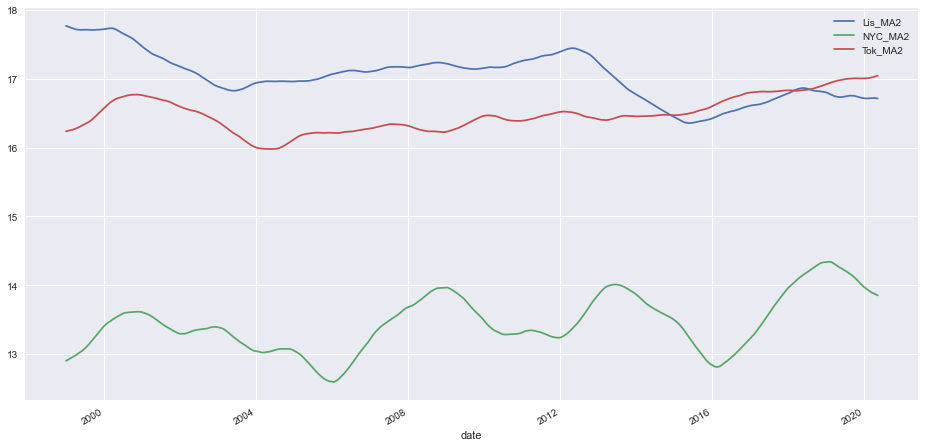

In [352]:
opop["Lis_MA2"]=opop["Lis_MA"].rolling(1089, center=False).mean()
opop["NYC_MA2"]=opop["NYC_MA"].rolling(1089, center=False).mean()
opop["Tok_MA2"]=opop["Tok_MA"].rolling(1089, center=False).mean()

opop.plot(figsize=(16,8), y=["Lis_MA2", "NYC_MA2", "Tok_MA2"])

**Rationale:** _After displaying the long-term trend of temperatures in the 3 cities, the results are curves that are still noisy, but after a closer look, they deliver the information that Tokyo experienced an increase in the mean temperatures over the years, Lisbon a decrease, and NYC is not that much explainable because the trend is not stable. To provide further information, we applied once again the MA to the MA to soften the curve, and the same results were provided. I chose on purpose a 3 year window to observe the change over 3 years at once, and at the same softening more the curve to get more accurate information (even though the loss of data is indeed a lot)._

## Question 3 (4 points)

This third question focus on understanding the relations between the temperature in different cities.

Select three cities, two in the North hemisphere and one in the South hemisphere (e.g. Lisbon, Rome and Sydney) and use the studied methods to verify whether there is a relation between the evolution of temperature in these cities over time.

In the Markdown cell below your code, comment the results obtained.



In [344]:
#Solve question here. Briefly discuss the rationale of your solution in the following markdown cell.
Lisbon=dataDF[dataDF["city"]=='Lisbon']
Rome=dataDF[dataDF["city"]=='Rome']
Syndey=dataDF[dataDF["city"]=='Sydney']

cities2DF=pd.merge(Lisbon, Rome, on="date", how="inner")
cities3DF=pd.merge(cities2DF, Syndey, on ='date', how="inner")

cities3DF=cities3DF.set_index("date")

cities3DF.columns=["Lisbon","Temp_Lisbon","Rome","Temp_Rome","Sydney","Temp_Sydney"]

rv={"Correlation Sydney-Rome":cities3DF["Temp_Rome"].corr(cities3DF["Temp_Sydney"]),
    "Correlation Lisbon-Rome":cities3DF["Temp_Rome"].corr(cities3DF["Temp_Lisbon"]),
    "Correlation Lisbon-Sydney":cities3DF["Temp_Lisbon"].corr(cities3DF["Temp_Sydney"])}

rv

{'Correlation Sydney-Rome': -0.6692655945733545,
 'Correlation Lisbon-Rome': 0.7950084258858461,
 'Correlation Lisbon-Sydney': -0.6187463194601798}

**Rationale and comments:**
_When calculating the correlation between Lisbon and Rome, the result is positive, which means they both get hot and cold weather at the same time. When calculating the correlation between Sydney and Lisbon, and Sydney and Rome, it gives us a negative correlation, which is totally accurate because Rome and Lisbon are in the same North hemisphere, but Sydney in the South hemisphere. That being said, we can infer that the Northern hemisphere and the Southern hemisphere do not experience the same weather conditions, mainly when one is hot the other is cold (negative correlation)._

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-level.
.

### **4.a)** Print the city with the highest and lowest temperature in each region



In [219]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
def nlargetemp(p):
    return p.nlargest(1,["temperature"])
def nsmalltemp(p):
    return p.nsmallest(1,["temperature"])
fullDF = pd.merge(citiesDF, dataDF, on="city", how="inner")
print("Maximum in regions are :")
print(fullDF[["region", "date", "city", "temperature"]].groupby("region").apply(nlargetemp).set_index("region"))
print("_____________________________________________________________________")
print("Minimum in regions are :")
print(fullDF[["region", "date", "city", "temperature"]].groupby("region").apply(nsmalltemp).set_index("region"))

Maximum in regions are :
                                        date            city  temperature
region                                                                   
Africa                            1998-04-18          Niamey         39.3
Asia                              1998-05-28           Delhi         39.8
Australia/South Pacific           2009-01-28          Sydney         36.0
Europe                            1996-06-27         Nicosia         39.2
Middle East                       2005-07-17          Kuwait         43.3
North America                     1995-05-13       Monterrey         39.7
South/Central America & Carribean 2004-08-16  Port au Prince         36.3
_____________________________________________________________________
Minimum in regions are :
                                        date        city  temperature
region                                                               
Africa                            2005-01-27     Algiers          0.7
Asia

### ***4.2*** Plot the average temperature for each region over the years

It is possible to aggregate information at different granularities - e.g. day, month, year. Select one and discuss what kind of trend the selected granualrity helps illustrating.


In [318]:
#Solve question here. Briefly discuss your solution in the following markdown cell.

# Replace regions names into one name to make them local variables
fullDF["region"] = fullDF["region"].replace(to_replace="North America", value="NorthAmerica")
fullDF["region"] = fullDF["region"].replace(to_replace="Middle East", value="MiddleEast")
fullDF["region"] = fullDF["region"].replace(to_replace="Australia/South Pacific", value="AusSouthPacif")
fullDF["region"] = fullDF["region"].replace(to_replace="South/Central America & Carribean", value="SCAmericaCarr")

pd.set_option('mode.chained_assignment', None) #disabling copy warinings

regions = fullDF["region"].unique().tolist()

# Creating local variables named after continent and storing in subsets from fullDF that contain information about the same continent
for r in regions:
    locals()[r] = fullDF[fullDF["region"]==r]

<AxesSubplot:xlabel='date'>

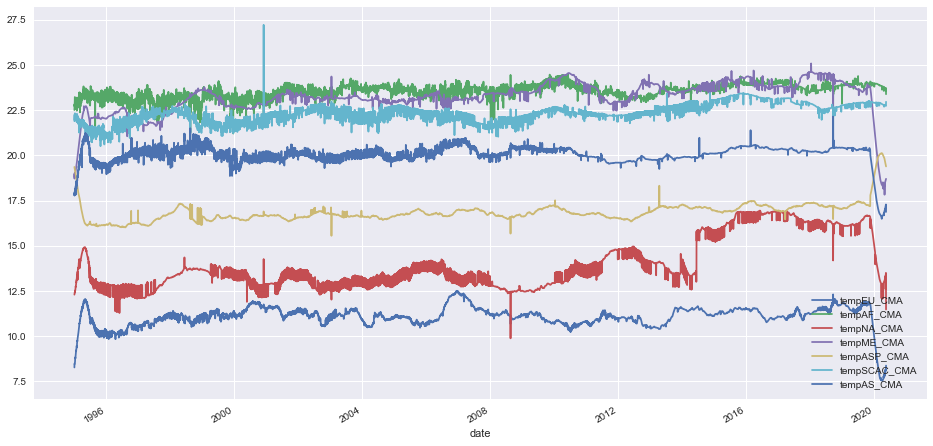

In [298]:
# Daily mean temperatures in regions over the years (Centered Moving Average)

NorthAmerica["tempNA_CMA"] = NorthAmerica["temperature"].rolling(363, center=True).mean()
Africa["tempAF_CMA"] = Africa["temperature"].rolling(363, center=True).mean()
Europe["tempEU_CMA"] = Europe["temperature"].rolling(363, center=True).mean()
MiddleEast["tempME_CMA"] = MiddleEast["temperature"].rolling(363, center=True).mean()
AusSouthPacif["tempASP_CMA"] = AusSouthPacif["temperature"].rolling(363, center=True).mean()
SCAmericaCarr["tempSCAC_CMA"] = SCAmericaCarr["temperature"].rolling(363, center=True).mean()
Asia["tempAS_CMA"] = Asia["temperature"].rolling(363, center=True).mean()

# Daily mean temperatures in regions over the years (Weighted Moving Average) 

#weight=list(range(363))
#NorthAmerica["tempNA_CMA"] = NorthAmerica["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#Africa["tempAF_CMA"] = Africa["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#Europe["tempEU_CMA"] = Europe["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#MiddleEast["tempME_CMA"] = MiddleEast["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#AusSouthPacif["tempASP_CMA"] = AusSouthPacif["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#SCAmericaCarr["tempSCAC_CMA"] = SCAmericaCarr["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))
#Asia["tempAS_CMA"] = Asia["temperature"].rolling(363, center=True).apply(lambda x : sum(x*weight)/sum(weight))

# The plot doesn't give that much information and doesn't reduce noises, so we'll stick to the CMA

temp1 = pd.merge(Europe[["date", "tempEU_CMA"]].groupby("date").mean(), Africa[["date", "tempAF_CMA"]].groupby("date").mean(), 
                 on="date", how="inner")
temp2 = pd.merge(temp1, NorthAmerica[["date", "tempNA_CMA"]].groupby("date").mean(), on="date", how="inner")
temp3 = pd.merge(temp2, MiddleEast[["date", "tempME_CMA"]].groupby("date").mean(), on="date", how="inner")
temp4 = pd.merge(temp3, AusSouthPacif[["date", "tempASP_CMA"]].groupby("date").mean(), on="date", how="inner")
temp5 = pd.merge(temp4, SCAmericaCarr[["date", "tempSCAC_CMA"]].groupby("date").mean(), on="date", how="inner")
regionsMA = pd.merge(temp5, Asia[["date", "tempAS_CMA"]].groupby("date").mean(), on="date", how="inner")

regionsMA.plot(figsize=(16,8), y=regionsMA.columns)

<AxesSubplot:xlabel='date'>

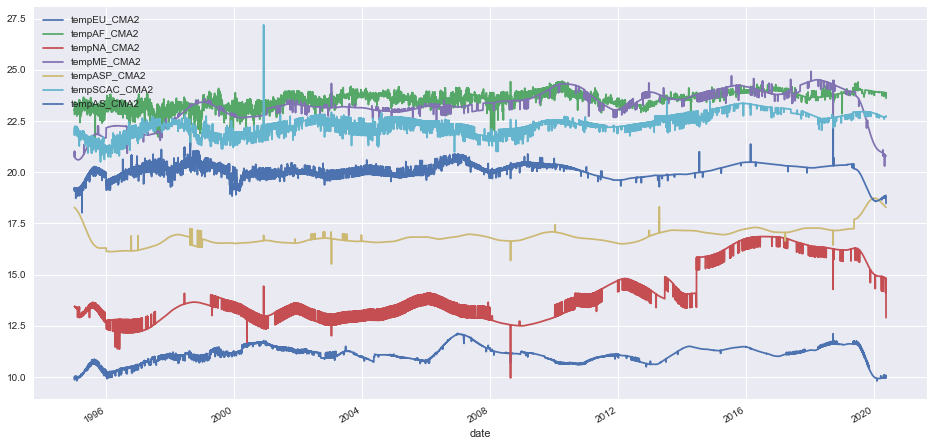

In [299]:
# To soften the curve, we computed once again the Moving Average of the Moving average from before
# Daily mean temperatures in regions over the years (softened)

NorthAmerica["tempNA_CMA2"] = NorthAmerica["tempNA_CMA"].rolling(363, center=True).mean()
Africa["tempAF_CMA2"] = Africa["tempAF_CMA"].rolling(363, center=True).mean()
Europe["tempEU_CMA2"] = Europe["tempEU_CMA"].rolling(363, center=True).mean()
MiddleEast["tempME_CMA2"] = MiddleEast["tempME_CMA"].rolling(363, center=True).mean()
AusSouthPacif["tempASP_CMA2"] = AusSouthPacif["tempASP_CMA"].rolling(363, center=True).mean()
SCAmericaCarr["tempSCAC_CMA2"] = SCAmericaCarr["tempSCAC_CMA"].rolling(363, center=True).mean()
Asia["tempAS_CMA2"] = Asia["tempAS_CMA"].rolling(363, center=True).mean()

temp11 = pd.merge(Europe[["date", "tempEU_CMA2"]].groupby("date").mean(), Africa[["date", "tempAF_CMA2"]].groupby("date").mean(), 
                  on="date", how="inner")
temp22 = pd.merge(temp11, NorthAmerica[["date", "tempNA_CMA2"]].groupby("date").mean(), on="date", how="inner")
temp33 = pd.merge(temp22, MiddleEast[["date", "tempME_CMA2"]].groupby("date").mean(), on="date", how="inner")
temp44 = pd.merge(temp33, AusSouthPacif[["date", "tempASP_CMA2"]].groupby("date").mean(), on="date", how="inner")
temp55 = pd.merge(temp44, SCAmericaCarr[["date", "tempSCAC_CMA2"]].groupby("date").mean(), on="date", how="inner")
regionsMA2 = pd.merge(temp55, Asia[["date", "tempAS_CMA2"]].groupby("date").mean(), on="date", how="inner")

regionsMA2.plot(figsize=(16,8), y=regionsMA2.columns)

<AxesSubplot:xlabel='date'>

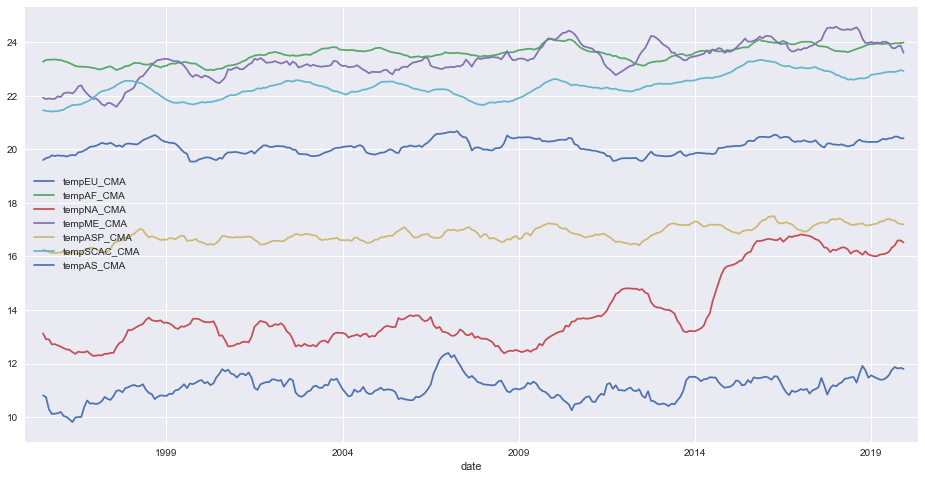

In [332]:
#Monthly mean temperatures in regions over the years

monthlyAS = Asia.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlyAF = Africa.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlyME = MiddleEast.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlyEU = Europe.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlyASP = AusSouthPacif.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlySCAC = SCAmericaCarr.set_index("date").groupby(pd.Grouper(freq='M')).mean()
monthlyNA = NorthAmerica.set_index("date").groupby(pd.Grouper(freq='M')).mean()

monthlyNA["tempNA_CMA"] = monthlyNA["temperature"].rolling(12, center=True).mean()
monthlyAF["tempAF_CMA"] = monthlyAF["temperature"].rolling(12, center=True).mean()
monthlyEU["tempEU_CMA"] = monthlyEU["temperature"].rolling(12, center=True).mean()
monthlyME["tempME_CMA"] = monthlyME["temperature"].rolling(12, center=True).mean()
monthlyASP["tempASP_CMA"] = monthlyASP["temperature"].rolling(12, center=True).mean()
monthlySCAC["tempSCAC_CMA"] = monthlySCAC["temperature"].rolling(12, center=True).mean()
monthlyAS["tempAS_CMA"] = monthlyAS["temperature"].rolling(12, center=True).mean()

temp111 = pd.merge(monthlyEU["tempEU_CMA"].groupby("date").mean(), monthlyAF["tempAF_CMA"].groupby("date").mean(), 
                  on="date", how="inner")
temp222 = pd.merge(temp111, monthlyNA["tempNA_CMA"].groupby("date").mean(), on="date", how="inner")
temp333 = pd.merge(temp222, monthlyME["tempME_CMA"].groupby("date").mean(), on="date", how="inner")
temp444 = pd.merge(temp333, monthlyASP["tempASP_CMA"].groupby("date").mean(), on="date", how="inner")
temp555 = pd.merge(temp444, monthlySCAC["tempSCAC_CMA"].groupby("date").mean(), on="date", how="inner")
monthlyRegionsMA = pd.merge(temp555, monthlyAS["tempAS_CMA"].groupby("date").mean(), on="date", how="inner")

monthlyRegionsMA.plot(figsize=(16,8), y=monthlyRegionsMA.columns)

<AxesSubplot:xlabel='date'>

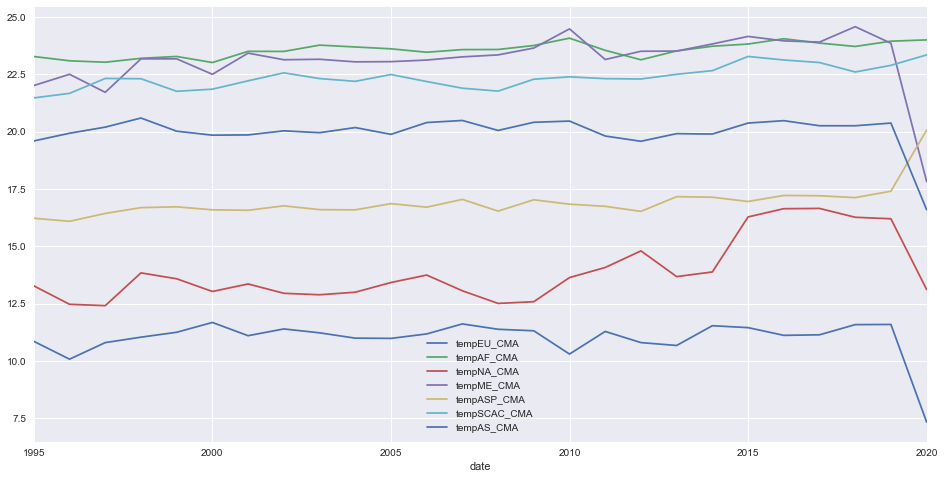

In [334]:
#Yearly mean temperatures in regions over the years

yearlyAS = Asia.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlyAF = Africa.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlyME = MiddleEast.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlyEU = Europe.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlyASP = AusSouthPacif.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlySCAC = SCAmericaCarr.set_index("date").groupby(pd.Grouper(freq='A')).mean()
yearlyNA = NorthAmerica.set_index("date").groupby(pd.Grouper(freq='A')).mean()

yearlyNA["tempNA_CMA"] = yearlyNA["temperature"].rolling(1, center=True).mean()
yearlyAF["tempAF_CMA"] = yearlyAF["temperature"].rolling(1, center=True).mean()
yearlyEU["tempEU_CMA"] = yearlyEU["temperature"].rolling(1, center=True).mean()
yearlyME["tempME_CMA"] = yearlyME["temperature"].rolling(1, center=True).mean()
yearlyASP["tempASP_CMA"] = yearlyASP["temperature"].rolling(1, center=True).mean()
yearlySCAC["tempSCAC_CMA"] = yearlySCAC["temperature"].rolling(1, center=True).mean()
yearlyAS["tempAS_CMA"] = yearlyAS["temperature"].rolling(1, center=True).mean()

temp1111 = pd.merge(yearlyEU["tempEU_CMA"].groupby("date").mean(), yearlyAF["tempAF_CMA"].groupby("date").mean(), 
                  on="date", how="inner")
temp2222 = pd.merge(temp1111, yearlyNA["tempNA_CMA"].groupby("date").mean(), on="date", how="inner")
temp3333 = pd.merge(temp2222, yearlyME["tempME_CMA"].groupby("date").mean(), on="date", how="inner")
temp4444 = pd.merge(temp3333, yearlyASP["tempASP_CMA"].groupby("date").mean(), on="date", how="inner")
temp5555 = pd.merge(temp4444, yearlySCAC["tempSCAC_CMA"].groupby("date").mean(), on="date", how="inner")
yearlyRegionsMA = pd.merge(temp5555, yearlyAS["tempAS_CMA"].groupby("date").mean(), on="date", how="inner")

yearlyRegionsMA.plot(figsize=(16,8), y=yearlyRegionsMA.columns)

**Discussion:** to be completed: _As I plotted the 3 graphs, I believe that they all deliver the same piece of information. 
For the **daily** graph: I went for a Centered Moving Average and the Weighted as well, but the second one didn't give much significant results. For the CMA it  gave some decent result for a window of 363, but we can see that it is still noisy. I had the idea of applying the same thing I did on question two which is the CMA of the CMA to soften the curve a little, but the results are pretty much the same. However, if we look closely on the second graph, we can see that some continents display a trend of increasing temperature over the years as North Africa, South and Central America and the Carribeans, Africa, Australia and South Pacific, Middle East ; and a more or less stability for Europe and Asia.
For the **monthly** graph: for a CMA of a moving window of 12, we get less noises than the daily one, and the information on the graph confirms what we have noticed in the daily one as well.
For the **yearly** graph: This one is perfect for analysis, as it is not noisy at all for a CMA of n=1, and it delivers the same information as well._

_**The same information is confirmed by the 3 levels of data granularity, except I would stick to the yearly one because of the dataset we have is complete and consistent and has records from 1995 to 2020, so I believe the yearly graph delivering accurate information is a sign that it is the best way to explain the variation of mean temperatures over the years.**_

**P.S: the temperatures drop as we get closer to 2020 because the records we have for 2020 is only winter, so obviously the mean for 2020 will drop as we don't have hot temperatures to compensate the drop.**